<a href="https://colab.research.google.com/github/Nayan3101/Capstone-project-Regression---Retail-Sales-Prediction/blob/main/Nayan_Capstone_Project_M6_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression - Retail Sales Prediction**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - NAYAN SURYAWANSHI


# **Project Summary -**

# **GitHub Link -**

https://github.com/Nayan3101

# **Problem Statement**


**The retail industry, exemplified by Rossmann's 3,000 drug stores across 7 European countries, faces the recurring challenge of accurately predicting daily sales up to six weeks in advance. The accuracy of these sales forecasts is significantly affected by various dynamic factors, including promotional activities, competition, school and state holidays, seasonality, and geographical location. Currently, individual Rossmann store managers rely on their unique insights and circumstances to make these predictions, resulting in a wide range of forecasting accuracy.**

**In this machine learning capstone project, the primary objective is to develop a robust regression model for Retail Sales Prediction. The project leverages historical sales data from 1,115 Rossmann stores to forecast the "Sales" column in the test set. This predictive model should take into account the intricate interplay of sales-influencing variables, adapt to temporal and geographical variations, and accommodate the occasional store closures due to refurbishment.**

**The successful completion of this project will have far-reaching implications. By delivering a reliable sales prediction model, it will not only enhance the overall accuracy of sales forecasts for Rossmann but also streamline the decision-making process for store managers. This model is expected to optimize inventory management, allocation of resources, and promotion planning, ultimately contributing to the company's profitability and customer satisfaction. Furthermore, it will provide a data-driven framework to improve sales predictions, leading to better informed business decisions and more efficient store operations.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 = '/content/drive/MyDrive/almabetter/store.csv'
data1 = pd.read_csv(url1)

In [4]:
url2 = '/content/drive/MyDrive/Rossmann Stores Data.csv'
data2 = pd.read_csv(url2)

<ipython-input-4-b2110630ed5a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(url2)


### Dataset First View

In [5]:
# Dataset First Look
data1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
data2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data1.shape

(1115, 10)

In [ ]:
data2.shape

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data1.duplicated().sum()

0

In [ ]:
data2.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Visualizing the missing values
data2.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What did you know about your dataset?

1. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. we are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set.
2. data1 contains some null values whereas data2 has no null values
3. there are no duplicate values in both dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
data2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
data1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
data2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description

**DATA1**
  1. **Store:** unique identifier for each Rossmann store.

  2. **StoreType:** category of the store (e.g., A, B, C, or D).

  3. **Assortment:** describe the level of products available in the store.

  4. **CompetitionDistance:** distance to the nearest competitor store.

  5. **CompetitionOpenSinceMonth**: specify the month when the nearest competitor store opened.

  6. **CompetitionOpenSinceYear:** year when the nearest competitor store opened.

  7. **Promo2:** This binary column (0 OR 1) indicate whether promo2 is active for store

  8. **Promo2SinceWeek:** calendar week when promo2 started for the store.

  9. **Promo2SinceYear:** year when promo2 started.

  10. **PromoInterval:** describe the intervals during which promo2 runs.

**DATA2**
  1. **Store:** unique identifier for each Rossmann store.

  2. **DayOfWeek:** indicates the day of the week for each data point ranging from 1 (Monday) to 7 (Sunday). It helps capture sales.

  3. **Date:** This column contains the date of the sales data point, providing a time reference for each observation. It is crucial for analyzing time series data and seasonality.

  4.**Sales:** represents the daily sales of store on a particular date.

  5.**Customers:** number of customers who visited the store.

  6. **Open:** This binary column indicates whether the store was open (1) or closed (0) on the respective date.

  7. **Promo:** This binary column (0 or 1) may represent whether there was a promotion on the given date.

  8. **StateHoliday:** indicate whether the date corresponds to a state holiday.

  9. **SchoolHoliday:** This binary column (0 or 1) indicate whether there was a school holiday on the given date.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_value_d1 = {col: data1[col].unique() for col in data1.columns}
unique_value_d1



{'Store': array([   1,    2,    3, ..., 1113, 1114, 1115]),
 'StoreType': array(['c', 'a', 'd', 'b'], dtype=object),
 'Assortment': array(['a', 'c', 'b'], dtype=object),
 'CompetitionDistance': array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
        2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
        1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
        2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
        2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
        2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
        1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
        9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
        4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
        7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
        2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.75

In [ ]:
unique_count_d1 = {col: len(data1[col].unique()) for col in data1.columns}
unique_count_d1

{'Store': 1115,
 'StoreType': 4,
 'Assortment': 3,
 'CompetitionDistance': 655,
 'CompetitionOpenSinceMonth': 13,
 'CompetitionOpenSinceYear': 24,
 'Promo2': 2,
 'Promo2SinceWeek': 25,
 'Promo2SinceYear': 8,
 'PromoInterval': 4}

In [ ]:
unique_value_d2 = {col: data2[col].unique() for col in data2.columns}
unique_value_d2

{'Store': array([   1,    2,    3, ..., 1113, 1114, 1115]),
 'DayOfWeek': array([5, 4, 3, 2, 1, 7, 6]),
 'Date': array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
        '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
        '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
        '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
        '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
        '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
        '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
        '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
        '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
        '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
        '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
        '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
        '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
        '2015-06-09', '2015-06-08', '2015-06-07', '2015-

In [ ]:
unique_count_d2 = {col: len(data2[col].unique()) for col in data2.columns}
unique_count_d2

{'Store': 1115,
 'DayOfWeek': 7,
 'Date': 942,
 'Sales': 21734,
 'Customers': 4086,
 'Open': 2,
 'Promo': 2,
 'StateHoliday': 5,
 'SchoolHoliday': 2}

## 3. ***Data Wrangling***

### Data Wrangling Code

**Since there are no null values in data 2 so we will handel null values from data 1**

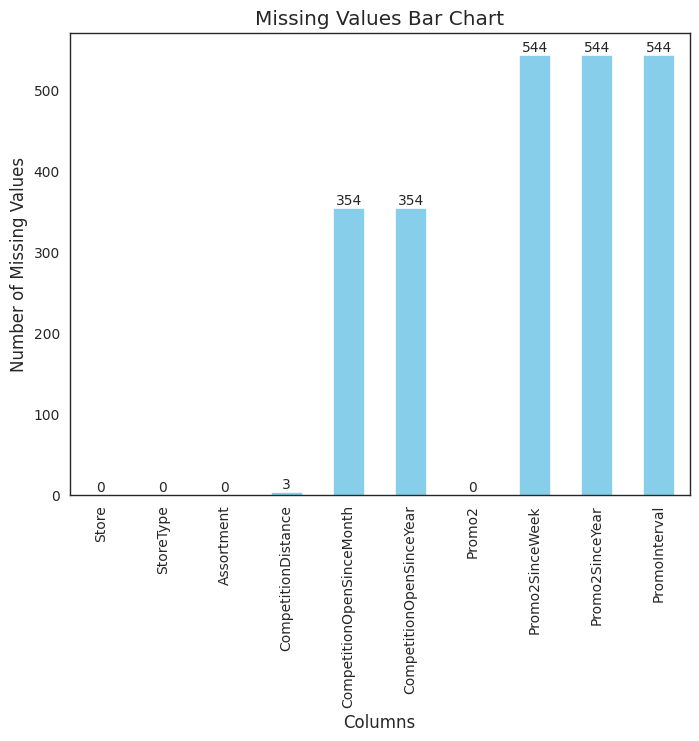

In [ ]:
plt.figure(figsize=(8, 6))
data1.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Missing Values Bar Chart')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
for i, count in enumerate(data1.isnull().sum()):
    data1.isnull().sum().plot(kind='bar', color='skyblue').text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

**To replace null values we need to know the data type of data1's columns so that we can replace the null values with their mean,mode & median accordingly**

In [ ]:
data1.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [6]:
data1['CompetitionDistance'].fillna(data1['CompetitionDistance'].mean(), inplace=True)


**'CompetitionOpenSinceMonth' & 'CompetitionOpenSinceYear'**
both column represent month and year when nearest compititor store opened.the null value indicates that there is no stores open so we fill fill the null values with "0"

In [7]:
data1['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
data1['CompetitionOpenSinceYear'].fillna(0, inplace=True)

**'Promo2SinceWeek' & 'Promo2SinceYear'**
these 2 column indicates munth and yesr when nearest compititior store opend. Since some rows are empty,this means that no store were opened that time.so we will fill the null values with "0"

In [8]:
data1['Promo2SinceWeek'].fillna(0, inplace=True)
data1['Promo2SinceYear'].fillna(0, inplace=True)
data1['PromoInterval'].fillna('NoPromo', inplace=True)

In [9]:
has_null_values = data1.isnull().any().any()

if has_null_values:
    print("There are still null values in the data.")
else:
    print("There are no null values in the data.")

There are no null values in the data.


In [ ]:
data1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
data2.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Now we can clearly see that both the Data has 0 null values**

In data2 we have a column "Date" which is in object form. So we need to change the format of the column in date format

In [10]:
data2['Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
print(data2['Date'].dtype)

datetime64[ns]


In [ ]:
data2.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [ ]:
data1.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

**NOW WE WILL MERGE BOTH DATA1 AND DATA2 FOR VIZUALIZATION AND ANALYSIS WORK**

In [11]:
# Merging both datasets
df = data2.merge(right=data1, on='Store',how='left')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NoPromo
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,NoPromo
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NoPromo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,NoPromo
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,NoPromo
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,NoPromo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

**now we will separaetly  extract date, month & year from column"Date"**

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayName'] = df['Date'].dt.day_name()

<ipython-input-11-320f2b55e201>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday


In [ ]:
df.copy()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NoPromo,2015,7,31,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,NoPromo,2013,1,1,Tuesday


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayName'],
      dtype='object')

### What all manipulations have you done and insights you found?

1. Importing important libraries such as numpy,pandas,matplotlib, seaborn,etc.
2. mounting google drive in colab
3. Entered URL for both data set and used pandas to read those Data Set
4. finally printed both the data set i.e data1 & data2
5. Then used various funtions like 'shape', 'describe', 'info' to know data more accurately
6. Then checking DUplicate and null values for both data sets. by doing this i found out that data1 has null value whereas data2 has no null value
7. Then i checked unique value for each column for both data set.
8. replaced all the null values from dat1 by using apropriate method like mean,mode,median
9. After Replacing null values i again checked null values and found there no null values left in both data set
10. In data2 we have a column "Date" which is in object form. So i changed the format of the column in date format
11. Then i mergerd both data set for vizualization and analysis work
12. After merging the final data i.e 'df' was printed

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**<h2>STORE CLOSURE PATTERN**

In [ ]:
closure_count = df.groupby(['DayOfWeek','Open'])['Open'].count().unstack()
closure_count

Open,0,1
DayOfWeek,,
1,7170,137560
2,1703,143961
3,3729,141936
4,11201,134644
5,7205,138640
6,672,144058
7,141137,3593


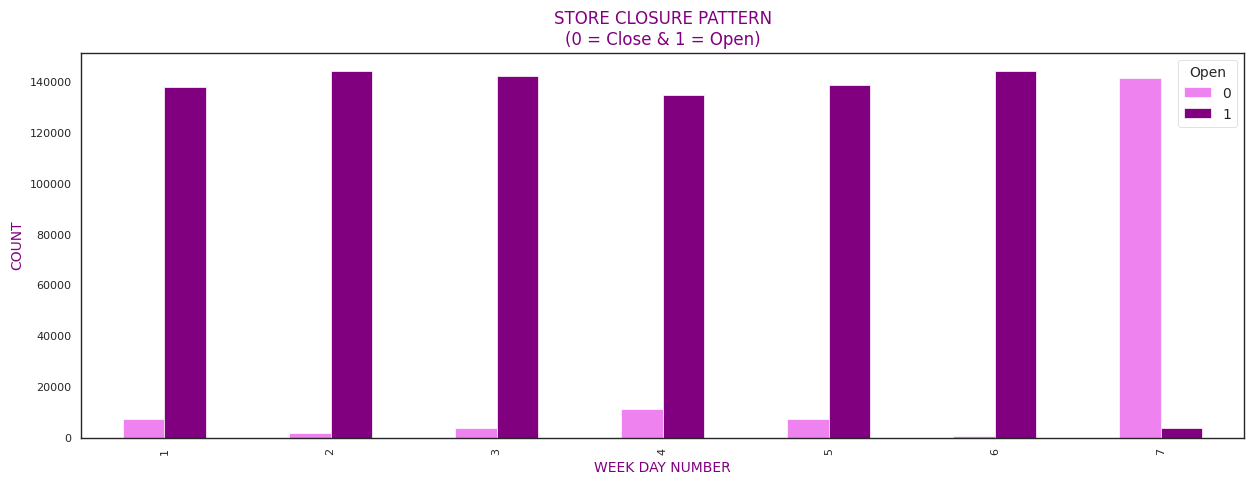

In [ ]:
closure_count.plot(kind='bar',figsize=(15,5),color=['violet','purple'],fontsize=8)
plt.title('''STORE CLOSURE PATTERN
(0 = Close & 1 = Open)''',fontsize = 12,color='purple')
plt.xlabel('WEEK DAY NUMBER',fontsize = 10,color='purple')
plt.ylabel('COUNT',fontsize = 10,color='purple')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar graph for visualizing the store closure pattern because it is an effective way to display categorical data (day of the week) against a quantitative variable (number of store closures). Bar graphs make it easy to compare and highlight differences in closure patterns across different days of the week.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from the chart is that a significant number of stores are closed on Sundays. This is evident from the relatively low bar of open for Sunday compared to the bars for other days of the week. The data shows a clear trend of store closures, indicating that Sunday is the day when many stores choose to remain closed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insight that stores are predominantly closed on Sundays can have both positive and negative implications for a business, depending on the context:

**Positive Impact:**

  1. **Cost Savings:** Stores that close on Sundays can potentially reduce operating costs such as labor, utilities, and maintenance.
  2. **Employee Well-Being:** It may provide employees with a regular day off, contributing to better work-life balance and job satisfaction.
  3. **Resource Allocation:** Knowing that Sundays are slower business days, retailers can optimize staff scheduling and resource allocation.

**Negative Impact:**

  1. **Missed Sales Opportunities:** Closing on Sundays may lead to missed sales opportunities, as some customers prefer to shop on weekends. This could impact overall revenue.
  2. **Competitive Disadvantage:** If competitors remain open on Sundays, a store's closure on that day could put them at a competitive disadvantage.
  3. **Customer Inconvenience:** Customers who rely on Sunday shopping might find it inconvenient if the store is closed, potentially leading to dissatisfaction.

#### Chart - 2

**<h2>SALES AFFECTED BY SCHOOL HOLIDAY**

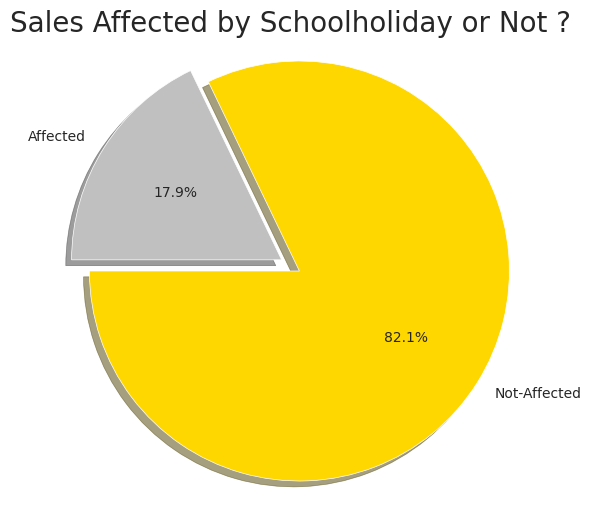

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the distribution of sales affected by school holidays. A pie chart is a suitable choice when you want to show the proportion of a whole (total sales) that is divided into different categories (affected and unaffected by school holidays). It provides a clear and easy-to-understand representation of the percentage breakdown.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from the chart is that approximately 17.9% of sales are affected by school holidays, while the remaining 82.1% are unaffected. This suggests that school holidays have a noticeable impact on a relatively small portion of sales, indicating that the majority of sales occur during non-school holiday periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impacts may include:

  1. Optimizing staffing and resource allocation for non-school holiday periods when sales are higher.
  2. Tailoring marketing and promotions to target the majority of sales during non-school holiday times.
  3. Offering special promotions or events during school holidays to potentially boost sales during those periods.

negative impacts :

  The insight itself does not necessarily lead to negative growth. However, how the business responds to this insight is crucial. If the business does not adapt its strategies to account for the seasonality of school holidays and non-school holiday periods, it might miss opportunities to maximize sales during both types of periods. The negative impact would come from failing to adjust operations and marketing efforts accordingly.

#### Chart - 3

**<h2> TYPE OF STORES**

In [ ]:
# Chart - 3 visualization code
store_type_count = df['StoreType'].value_counts()
store_type_count

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

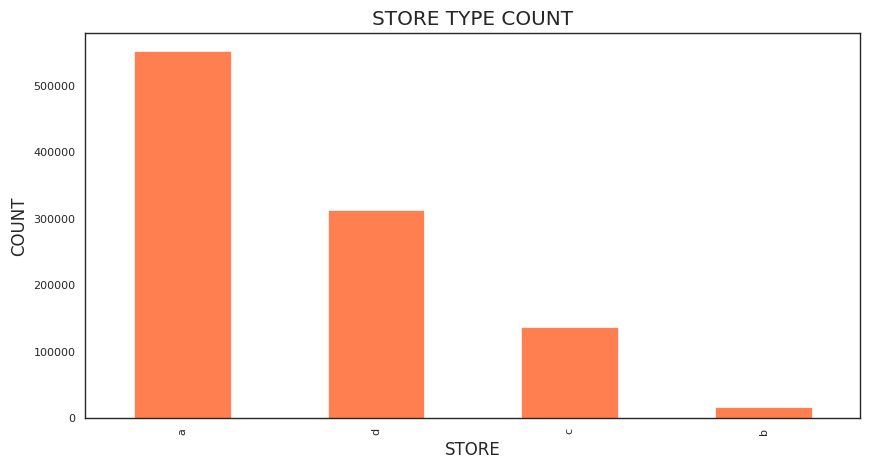

In [ ]:
store_type_count.plot(kind = 'bar',color = 'coral',fontsize = 8, figsize=(10,5))
plt.title('STORE TYPE COUNT')
plt.xlabel('STORE')
plt.ylabel('COUNT')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the counts of each store type because it's an effective way to compare categorical data. Bar charts make it easy to understand the distribution of different store types in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from the chart is that store type "a" has the highest count, followed by store type "d," then "c," and lastly "b." This suggests that store type "a" is the most prevalent in the dataset, while store type "b" is the least common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive business impact:

  1. **Resource Allocation:** Understanding the prevalence of each store type can help allocate resources, staff, and inventory more effectively.
  2. **Marketing Strategies:** Tailoring marketing and product strategies to the most common store types can lead to increased sales.
  3. **Expansion and Growth:** Identifying the most and least common store types can inform decisions about opening new stores or optimizing existing ones.
positive business impact:
  The insight about the distribution of store types itself is unlikely to lead to negative growth. However, how the business interprets and acts on this insight is critical. Potential negative impacts could arise if the business fails to adapt its strategies based on the prevalence of each store type. For example:

  Neglecting less common store types (e.g., type "b") may result in underperforming stores, missed opportunities, and potential negative growth.
  
  Overinvesting in the most common store type (e.g., type "a") without considering market dynamics may lead to inefficiencies.

#### Chart - 4

**<h2>AVERAGE SALES WITH AND WITHOUT PROMO**

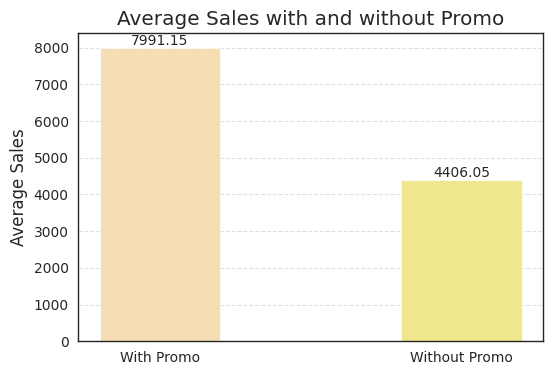

In [ ]:
promo_sales = df[df['Promo'] == 1]['Sales']
no_promo_sales = df[df['Promo'] == 0]['Sales']

labels = ['With Promo', 'Without Promo']
values = [promo_sales.mean(), no_promo_sales.mean()]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['wheat', 'Khaki'], width=0.4)
plt.title('Average Sales with and without Promo')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add sales values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for comparing the average sales with and without the Promo indicator because it provides a clear and concise way to visualize and compare these two values side by side.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from the chart is the significant difference in average sales between the two categories. "With Promo" has a notably higher average sale of 7991.15 compared to "Without Promo," which has a lower average sale of 4406.05. This suggests that running promotions positively influences sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**positive impact:**
  1. Increasing the frequency and effectiveness of promotions during strategic periods to boost sales.
  2. Tailoring promotional strategies to different store types or customer segments for maximum impact.
  3. Optimizing inventory and staff resources to handle increased sales during promotional periods.
  **negative impact:**
  
  The insight itself, which indicates that promotions drive higher sales, is generally positive. However, the potential negative impact could arise if promotions are not planned and executed strategically:

  Over-reliance on promotions without considering their profitability and sustainability could lead to lower margins and negative long-term growth.

  Promotions may attract one-time customers who only shop during sale events, potentially reducing customer loyalty during non-promotional periods.

#### Chart - 5

**<h2>AVERAGE SALES BY VARIOUS STORES**

In [ ]:
# Chart - 5 visualization code
average_sales_by_store_type = df.groupby('StoreType')['Sales'].mean().sort_values()
average_sales_by_store_type

StoreType
d     5641.819243
c     5723.629246
a     5738.179710
b    10058.837334
Name: Sales, dtype: float64

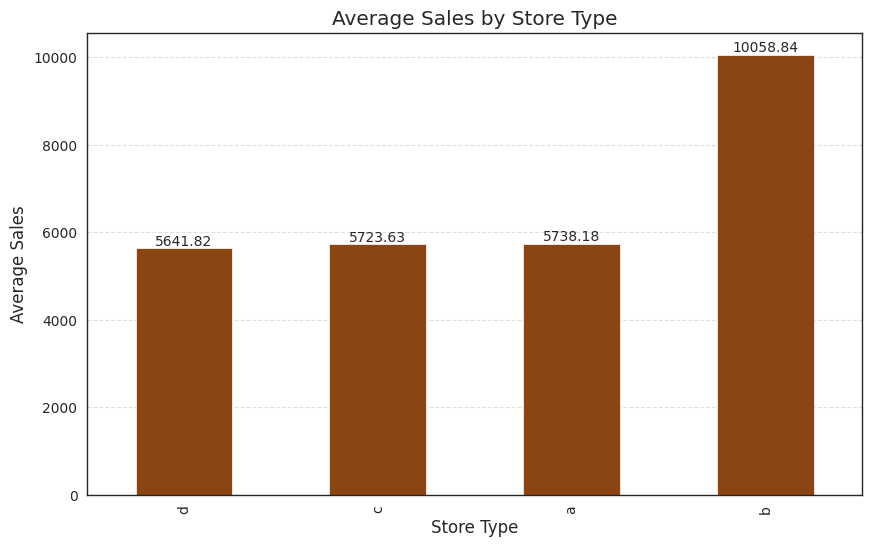

In [ ]:
plt.figure(figsize=(10, 6))
bars = average_sales_by_store_type.plot(kind='bar', color='saddlebrown')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add sales values on top of the bars
for bar, value in zip(bars.patches, average_sales_by_store_type):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the average sales by store type because it provides an effective way to compare the sales performance of different store types. Bar charts are suitable for displaying and comparing quantitative data for distinct categories.

##### 2. What is/are the insight(s) found from the chart?

The primary insights from the chart are as follows:

  1. Store type "b" has the highest average sales among all store types.
  2. Store type "a" follows with the second-highest average sales.
  3. Store type "c" has lower average sales than "b" and "a."
  4. Store type "d" has the lowest average sales among all store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive business impact:

  1. Resource Allocation: Allocating more resources to store types "b" and "a" to maximize sales potential.
  2. Marketing Strategies: Developing tailored marketing strategies for store types based on their sales performance.
  3. Expansion and Growth: Considering whether to open more stores of successful types ("b" and "a") and reevaluating the performance of store type "d."


#### Chart - 6

**<h2>AVERAGE SALES BY ASSORTMENT**

In [ ]:
# Chart - 6 visualization code
average_sales_by_assortment = df.groupby('Assortment')['Sales'].mean().sort_values()
average_sales_by_assortment

Assortment
a    5481.026096
c    6058.676567
b    8553.931999
Name: Sales, dtype: float64

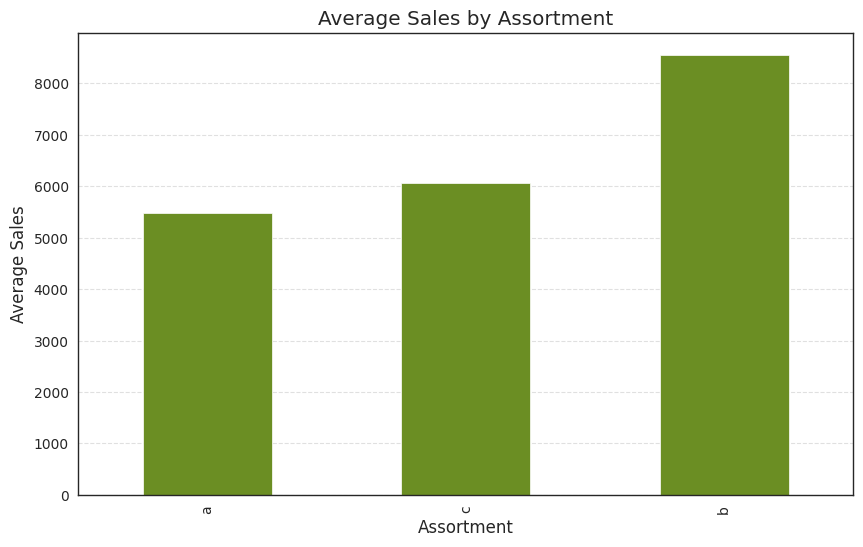

In [ ]:
plt.figure(figsize=(10, 6))
average_sales_by_assortment.plot(kind='bar', color='olivedrab')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the average sales by assortment because it provides an effective way to compare the sales performance of different assortment levels. Bar charts are suitable for displaying and comparing quantitative data for distinct categories, making it easy to see the differences.

##### 2. What is/are the insight(s) found from the chart?

The primary insights from the chart are as follows:

  1. Assortment level "b" has the highest average sales among all assortment levels.
  2. Assortment level "c" follows with the second-highest average sales.
  3. Assortment level "a" has the lowest average sales among all assortment levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impacts:**

  1. **Product Strategy:** Focusing on assortment level "b" to maximize sales and potentially expand product offerings in this category.
  2. **Pricing and Promotion Strategies:** Tailoring pricing and promotion strategies to match the performance of each assortment level.
  3. **Inventory Management:** Optimizing inventory based on the sales performance of different assortment levels.

**negative business impacts:**

  1. Neglecting assortment level "a" without considering strategies for improvement may lead to underutilized inventory and missed sales.
  2. Overinvesting in assortment level "b" without monitoring market trends and consumer preferences could result in inefficiencies.

#### Chart - 7

**<h2>SALES VS CUSTOMER CHART**

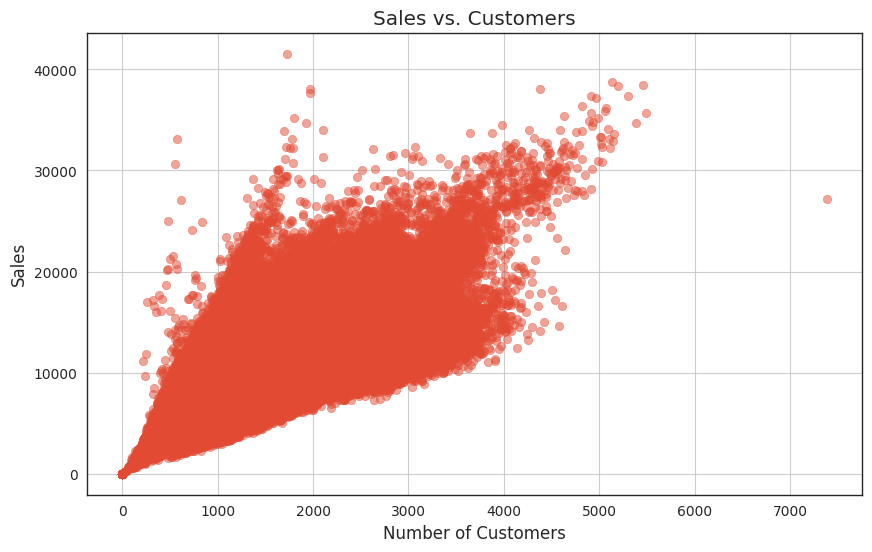

In [ ]:
# Chart - 7 visualization code
x = df['Customers']
y = df['Sales']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I initially selected a scatter plot because it's a common choice to visualize the relationship between two continuous variables (Sales and Customers). It's effective for understanding the dispersion and distribution of data points and identifying patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

The primary insight from the scatter plot is the general relationship between Sales and Customers:

  1. As the number of Customers increases, Sales tend to increase as well.
  2. There is a positive correlation between the two variables, indicating that higher customer footfall is associated with higher sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 positive business impact:

  1. **Staffing and Resource Allocation:** Businesses can better allocate staffing and resources to handle the expected sales volume based on the number of customers.
  2. **Marketing Strategies:** Understanding the correlation can help tailor marketing strategies to attract more customers and increase sales.
  3. **Sales Predictions:** It enables businesses to make more accurate sales forecasts based on expected customer traffic.

The insights themselves do not inherently lead to negative growth. However, potential negative impacts could occur if the business does not adapt its strategies based on the observed correlation:

  1. Focusing solely on increasing customer traffic without considering factors like pricing, product quality, or customer experience may not lead to sustained sales growth.
  2. Overstaffing during periods of low customer traffic can result in inefficient resource allocation.

#### Chart - 8

**<h2>AVERAGE YEAR SALES**

In [ ]:
average_sales_by_year = df.groupby('Year')['Sales'].mean()
average_sales_by_year

Year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

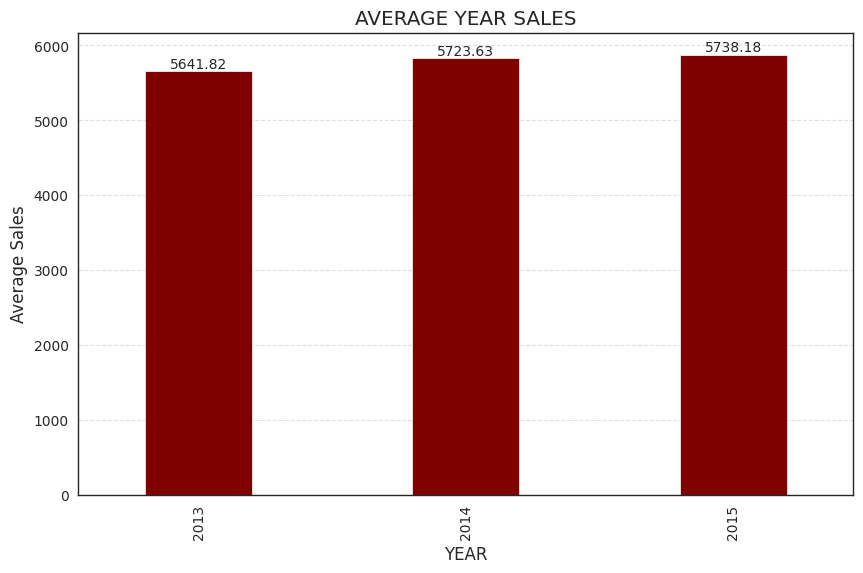

In [ ]:
plt.figure(figsize=(10, 6))
bars = average_sales_by_year.plot(kind='bar', color='maroon',width=0.4)
plt.title('AVERAGE YEAR SALES')
plt.xlabel('YEAR')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add sales values on top of the bars
for bar, value in zip(bars.patches, average_sales_by_store_type):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

bar chart  is a suitable choice for comparing average sales across different years. Bar charts effectively display and compare quantitative data for distinct categories, in this case, the years.

##### 2. What is/are the insight(s) found from the chart?

The primary insights from the bar chart are as follows:

  1. Average sales increased over the three years, with the highest average sales occurring in 2015, followed by 2014 and 2013.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impacts:**

  1. **Strategic Planning:** Businesses can consider factors that contributed to the increase in sales from 2013 to 2015 and plan future strategies accordingly.
  2. **Resource Allocation:** Allocating resources based on the sales trend, such as expanding during high-sales years and optimizing operations during lower-sales years.
  3. **Market Segmentation:** Tailoring marketing and promotional efforts based on the understanding of which years saw the highest sales.


#### Chart - 9

In [ ]:
# Chart - 9 visualization code
average_sales_by_day = df.groupby('DayOfWeek')['Sales'].mean().sort_index()
average_sales_by_day

DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

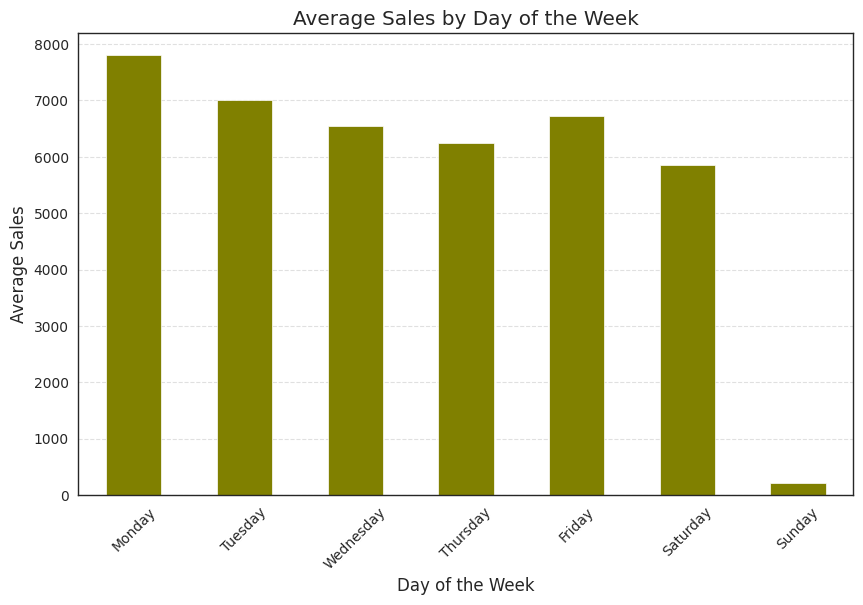

In [ ]:
# Define the day labels for better visualization
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
average_sales_by_day.plot(kind='bar', color='olive')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(7), day_labels, rotation=45)  # Assign day labels
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the sales by day of the week because a bar chart is well-suited for comparing quantitative values (sales) across distinct categories (days of the week). It provides a clear representation of how sales vary from one day to another.

##### 2. What is/are the insight(s) found from the chart?

The primary insights from the bar chart are as follows:

  1. Sales are highest on day 1 (Monday) and gradually decrease throughout the week.
  2. There is a significant drop in sales on day 7 (Sunday) compared to other days of the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impact:**

  1. **Staffing and Resource Allocation:** Businesses can allocate resources and staff based on the expected sales volume for each day.
  2. **Promotions and Marketing:** Adjusting marketing and promotion strategies to boost sales on days with lower performance can lead to positive impacts.
  3. **Inventory Management:** Optimizing inventory management based on sales trends for different days of the week.

**negative business impact:**

  1. Failing to adjust staffing and resources to match the expected sales volume for each day can result in inefficiencies.
  2. Not adapting marketing and promotional efforts for lower-performing days may lead to missed growth opportunities.

#### Chart - 10

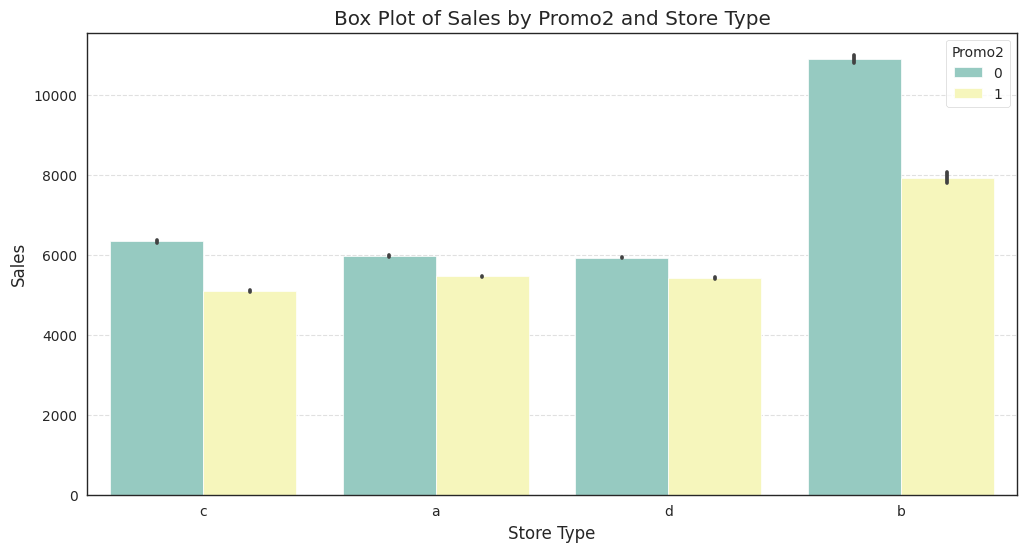

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 6))
sns.barplot(x='StoreType', y='Sales', hue='Promo2', data=df, palette='Set3')
plt.title('Box Plot of Sales by Promo2 and Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Promo2', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a bar plot with two categorical variables (StoreType and Promo2) on the x-axis and y-axis representing sales. The choice of this chart is appropriate because it allows for the comparison of sales in different store types while also distinguishing between stores with and without Promo2.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from this chart include:

  1. Among store types, those with Promo2 have higher average sales than those without Promo2.
  2. There is variation in sales within each store type and between stores with and without Promo2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**positive business impacts:**

  1. **Promotional Strategies:** Understanding which store types and promotional activities contribute to higher sales can help optimize marketing and promotional strategies.
  2. **Resource Allocation:** Businesses can allocate resources, such as marketing budgets and staff, to store types that show higher sales potential.
  3. **Inventory Management:** Based on the insights, inventory can be managed more effectively to meet demand in different store types.

there can be potential negative impacts if businesses fail to adapt their strategies based on the insights:

  Neglecting to allocate resources and marketing efforts to store types and promotional activities that drive higher sales can lead to missed growth opportunities.
  
  Ineffective inventory management based on sales trends may result in stockouts or overstocking.

#### Chart - 11 - Correlation Heatmap

<ipython-input-55-f7fbf87260cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= 'coolwarm',annot=True);


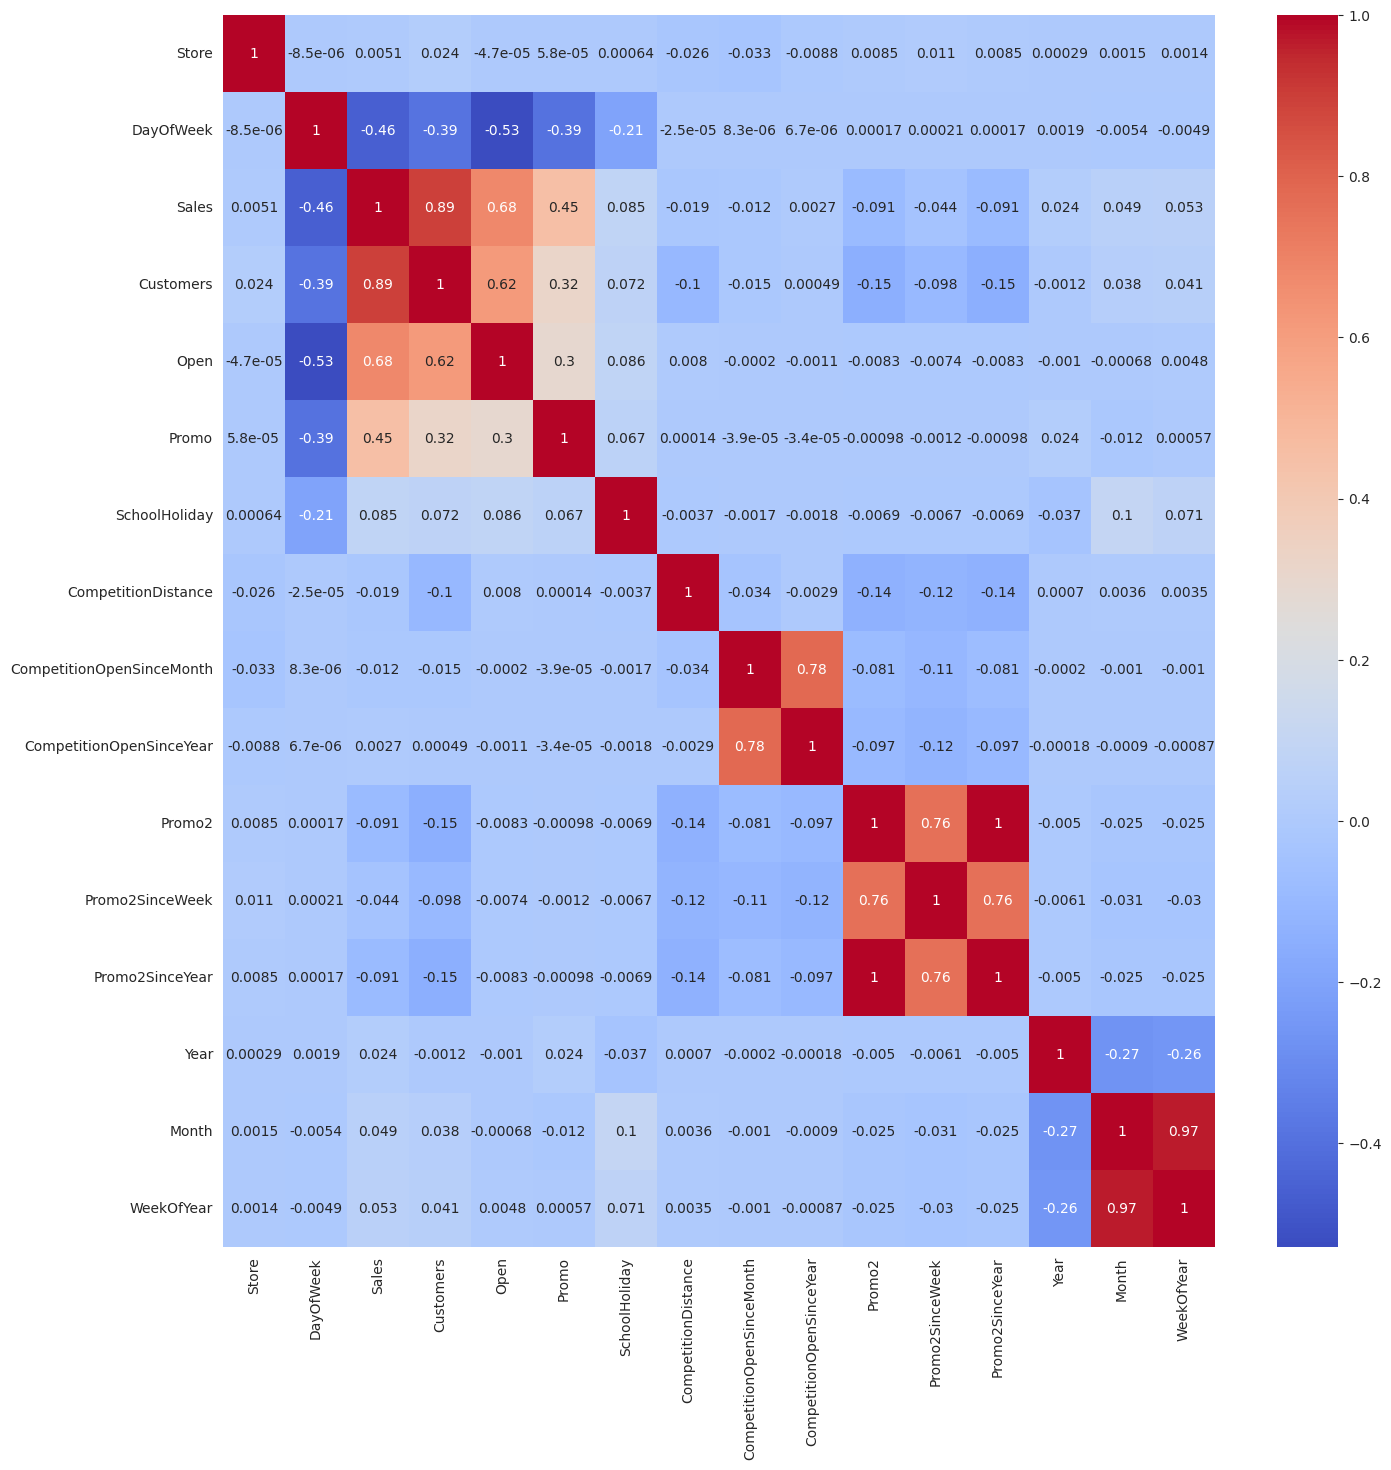

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), cmap= 'coolwarm',annot=True);
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

A correlation heatmap helps identify relationships between variables. Here are some potential insights you can look for based on the column names in your dataset:

**Sales and Customers:** Checking if "Sales" and "Customers" have a strong positive correlation. A high positive correlation suggests that when the number of customers increases, sales tend to increase as well.

**Promo and Sales:** Look for a positive correlation between "Promo" and "Sales." This could indicate that running promotions is associated with higher sales.

**Open and Sales:** Examine the correlation between "Open" and "Sales." If there's a strong positive correlation, it suggests that stores need to be open for sales to occur.

**Promo2:** Investigate the correlations involving "Promo2," "Promo2SinceWeek," and "Promo2SinceYear." This may reveal insights into another type of promotion and its impact on sales.

**Time-Related Columns:** Explore the correlations with "Year," "Month," "WeekOfYear," and "DayName" to see if there are any temporal patterns or seasonality in sales.

**Competition:** Check the correlation between "CompetitionDistance" and "Sales" to understand if proximity to competitors affects sales.

**Holidays:** Investigate how "StateHoliday" and "SchoolHoliday" correlate with "Sales" to see if there is any impact on sales during holidays.

#### Chart - 12 - Pair Plot

In [ ]:
df.columns

In [ ]:
df.dtypes

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


These statistical tests provide valuable insights into the relationships within the dataset and help in making data-driven conclusions about the hypotheses tested. The choice to accept or reject the null hypothesis depends on the specific p-values and significance levels used in the analysis, which may require further examination and consideration based on your dataset and research goals.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

  **Null Hypothesis (H0):** The average sales on school holidays are equal to the average sales on non-school holidays.
  
  **Alternative Hypothesis (H1):** The average sales on school holidays are different from the average sales on non-school holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
#We can perform a two-sample t-test to compare the means of sales on school holidays and non-school holidays.
import scipy.stats as stats

# Extract sales data for school holidays and non-school holidays
sales_school_holiday = df[df['SchoolHoliday'] == 1]['Sales']
sales_non_school_holiday = df[df['SchoolHoliday'] == 0]['Sales']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(sales_school_holiday, sales_non_school_holiday)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between school holidays and non-school holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between school holidays and non-school holidays.")

T-Statistic: 86.1660302014116
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in sales between school holidays and non-school holidays.


##### Which statistical test have you done to obtain P-Value?

i have used **Two-sample t-test**

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is appropriate for comparing the means of two groups (school holidays and non-school holidays). It helps us determine if there is a significant difference in sales between these two groups

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

  1. **Null Hypothesis (H0):** There is no significant difference in average sales between different store types.

  2. **Alternative Hypothesis (H1):** There is a significant difference in average sales between different store types.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Perform one-way ANOVA
from scipy.stats import f_oneway

# Extract sales data for different store types
store_type_sales = [df[df['StoreType'] == store_type]['Sales'] for store_type in df['StoreType'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*store_type_sales)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between different store types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between different store types.")

T-Statistic: 86.1660302014116
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in sales between different store types.


##### Which statistical test have you done to obtain P-Value?

I have used **One-way ANOVA** statistical test to obtain P-Value

##### Why did you choose the specific statistical test?

I chose one-way ANOVA because it allows us to determine if there are statistically significant differences in average sales between multiple groups (store types) simultaneously.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. **Null Hypothesis (H0):** There is no significant difference in average sales between stores with and without promotions.
2. **Alternative Hypothesis (H1):** There is a significant difference in average sales between stores with and without promotions.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Extract sales data for stores with and without promotions
sales_with_promo = df[df['Promo'] == 1]['Sales']
sales_without_promo = df[df['Promo'] == 0]['Sales']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(sales_with_promo, sales_without_promo)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between stores with and without promotions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between stores with and without promotions.")

T-Statistic: 511.54718673163774
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in sales between stores with and without promotions.


##### Which statistical test have you done to obtain P-Value?

I have performed a **two-sample t-test** to compare the means of sales in stores with and without promotions.

##### Why did you choose the specific statistical test?

We chose the two-sample t-test because it is suitable for comparing the means of two groups (stores with and without promotions) to determine if there is a significant difference in sales between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
WeekOfYear                   0
DayName                      0
dtype: int64

as you can see there is no null or missing value in above data as i have already performed cleaning part in the starting of this project.



#### What all missing value imputation techniques have you used and why did you use those techniques?

I have followed some steps to handle the missing and null values which are mentioned below:

1. 'CompetitionOpenSinceMonth' & 'CompetitionOpenSinceYear' both column represent month and year when nearest compititor store opened.the null value indicates that there is no stores open so we fill fill the null values with "0"

2. 'Promo2SinceWeek' & 'Promo2SinceYear' these 2 column indicates munth and yesr when nearest compititior store opend. Since some rows are empty,this means that no store were opened that time.so we will fill the null values with "0"

3. 'CompetitionDistance' column is filled with the mean value

### 2. Handling Outliers

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430020e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.705298e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,5.200000e+01


In [ ]:
# Handling Outliers & Outlier treatments
# Eye Test
Promo_mean = df['Promo'].mean()
Promo_std = df['Promo'].std()
Promo_threshold = Promo_mean + 2 * Promo_std

outliers_eye_test = df[df['Promo'] > Promo_threshold]
print("Outliers detected using Eye Test:")
print(outliers_eye_test)

Outliers detected using Eye Test:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Year, Month, WeekOfYear, DayName]
Index: []

[0 rows x 22 columns]


In [ ]:

# Flyover Inspection
Store_mean = df['Store'].mean()
Store_std = df['Store'].std()
Store_threshold = Store_mean + 2 * Store_std

outliers_flyover = df[df['Store'] > Store_threshold]
print("\nOutliers detected using Flyover Inspection:")
print(outliers_flyover)


Outliers detected using Flyover Inspection:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Year, Month, WeekOfYear, DayName]
Index: []

[0 rows x 22 columns]


##### What all outlier treatment techniques have you used and why did you use those techniques?

In our Dataset "df" I don't find any outlier That required treatment. I also used **Flyover inspection** and **Eye Test inspection** in come columns to check outlier but i did not find any out lier which can affet the analysis work

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Firstly we will find the categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'DayName'], dtype='object')


In [ ]:
df = pd.get_dummies(df,columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'DayName'],
                    prefix=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'DayName'])

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'WeekOfYear', 'StateHoliday_0',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_NoPromo',
       'DayName_Friday', 'DayName_Monday', 'DayName_Saturday',
       'DayName_Sunday', 'DayName_Thursday', 'DayName_Tuesday',
       'DayName_Wednesday'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

**ONE-HOT ENCODING**

I have Used One-hot encoding  technique which is used in data preprocessing to convert categorical variables columns ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'DayName'] into a binary matrix, making them suitable for machine learning algorithms that require numerical input. It's a way of representing categorical information as binary vectors.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Textual data preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks involving text. in this data set i have have already converted the cetegorical data using hot end encoding to tere is no need to perform Texual data preprocessing

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
corrilation_matrix = df.corr()
corrilation_matrix

<ipython-input-18-aeba5526c7db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrilation_matrix = df.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_NoPromo,DayName_Friday,DayName_Monday,DayName_Saturday,DayName_Sunday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,-0.026394,-0.032893,-0.008794,...,0.012181,-0.013087,-0.008488,-7.367846e-06,-3.202756e-06,-3.202756e-06,-3.202756e-06,-7.367846e-06,1.029030e-05,1.403551e-05
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.000025,0.000008,0.000007,...,0.000198,-0.000019,-0.000168,2.051650e-01,-6.113922e-01,4.081588e-01,6.120689e-01,3.398954e-04,-4.090137e-01,-2.043378e-01
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,-0.019207,-0.012431,0.002749,...,-0.034946,-0.053267,0.091040,1.008947e-01,2.153090e-01,7.801428e-03,-5.892185e-01,5.034419e-02,1.307637e-01,8.304695e-02
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.102777,-0.015188,0.000489,...,-0.078401,-0.063053,0.150159,9.690688e-02,1.577894e-01,2.101840e-02,-5.238830e-01,5.672817e-02,1.125357e-01,7.790089e-02
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,0.007981,-0.000200,-0.001144,...,-0.005269,-0.002074,0.008309,1.312645e-01,1.305277e-01,1.792209e-01,-8.733619e-01,1.014159e-01,1.722218e-01,1.570813e-01
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,0.000138,-0.000039,-0.000034,...,-0.001154,0.000107,0.000983,1.266868e-01,1.305998e-01,-3.198840e-01,-3.198840e-01,1.266868e-01,1.271513e-01,1.271488e-01
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,-0.003684,-0.001688,-0.001801,...,-0.004427,-0.002624,0.006909,7.455066e-02,6.027416e-02,-1.699359e-01,-1.699359e-01,6.365397e-02,7.746380e-02,6.310903e-02
CompetitionDistance,-0.026394,-2.458335e-05,-0.019207,-0.102777,0.007981,1.380801e-04,-0.003684,1.000000,-0.034391,-0.002881,...,-0.082626,-0.054949,0.139700,-1.956221e-05,-9.395849e-06,-9.395849e-06,-9.395849e-06,-1.956221e-05,3.461183e-05,3.264482e-05
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.012431,-0.015188,-0.000200,-3.919081e-05,-0.001688,-0.034391,1.000000,0.784968,...,-0.056377,-0.031330,0.081027,6.173393e-06,3.216708e-06,3.216708e-06,3.216708e-06,6.173393e-06,-1.297829e-05,-8.999139e-06
CompetitionOpenSinceYear,-0.008794,6.677520e-06,0.002749,0.000489,-0.001144,-3.429440e-05,-0.001801,-0.002881,0.784968,1.000000,...,-0.010996,-0.073972,0.097433,5.119555e-06,2.564661e-06,2.564661e-06,2.564661e-06,5.119555e-06,-9.921809e-06,-7.995960e-06


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# making copy of df
dp = df.copy()

In [ ]:
dp = dp.drop(columns=['Date'])

In [ ]:
dp.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'WeekOfYear', 'StateHoliday_0',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_NoPromo',
       'DayName_Friday', 'DayName_Monday', 'DayName_Saturday',
       'DayName_Sunday', 'DayName_Thursday', 'DayName_Tuesday',
       'DayName_Wednesday'],
      dtype='object')

In [ ]:
def remove_highly_correlated_columns(dp, threshold=0.7):
    # Calculate the correlation matrix
    corr_matrix = dp.corr().abs()

    # Extract upper triangle of the correlation matrix (excluding the diagonal)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_triangle.columns if any(abs(upper_triangle[column])>threshold)]
    dp.drop(columns=to_drop, inplace = True)
    return dp

    correlation_threshold = 0.7

    dp = remove_highly_correlated_columns(dp, correlation_threshold)

In [ ]:
dp.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'WeekOfYear', 'StateHoliday_0',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_NoPromo',
       'DayName_Friday', 'DayName_Monday', 'DayName_Saturday',
       'DayName_Sunday', 'DayName_Thursday', 'DayName_Tuesday',
       'DayName_Wednesday'],
      dtype='object')

In [ ]:
dp.shape

(1017209, 39)

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate the features and target variable
X = dp.drop('Sales', axis=1)
y = dp['Sales']

# Apply feature scaling if required
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Filter Methods - SelectKBest (Chi-square)
kbest = SelectKBest(k='all')  # Select top 5 features
X_filtered = kbest.fit_transform(X_scaled, y)

# Print the results
print("Filter Methods - SelectKBest (Chi-square):")
print(X_filtered)

Filter Methods - SelectKBest (Chi-square):
[[-1.73164032  0.50148416 -0.16826876 ... -0.40911553 -0.40881913
  -0.40882077]
 [-1.72853385  0.50148416 -0.01754036 ... -0.40911553 -0.40881913
  -0.40882077]
 [-1.72542738  0.50148416  0.40449914 ... -0.40911553 -0.40881913
  -0.40882077]
 ...
 [ 1.72275751 -1.00047591 -1.36332959 ... -0.40911553  2.4460695
  -0.40882077]
 [ 1.72586398 -1.00047591 -1.36332959 ... -0.40911553  2.4460695
  -0.40882077]
 [ 1.72897045 -1.00047591 -1.36332959 ... -0.40911553  2.4460695
  -0.40882077]]


In [ ]:
# Wrapper Methods - Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier()  # Use RandomForestClassifier as the estimator
rfe = RFE(estimator, n_features_to_select=3)  # Select 3 features
X_rfe = rfe.fit_transform(X_scaled, y)

# Print the results
print("\nWrapper Methods - Recursive Feature Elimination (RFE):")
print(X_rfe)

# it was not executed
# the session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out

##### What all feature selection methods have you used  and why?

Feature selection is a crucial step to identify the most relevant and informative features for our analysis.It is a crucial step in machine learning to improve model performance and reduce overfitting.the method that is used in feature selection are
1. Filter Methods
2. Wrapper Methods

##### Which all features you found important and why?

**SelectKBest** is a filter method that selects the top k features based on a scoring function, in this case, chi-square.
**kbest.fit_transform(X_scaled, y)** fits the SelectKBest model and transforms the input features X_scaled to select the top k features.
The selected features are stored in **X_filtered.**

**RFE** is a wrapper method that recursively eliminates features by training an estimator (in this case, **RandomForestClassifier**) and removing the least important features.
**rfe.fit_transform(X_scaled, y)** fits the RFE model and transforms the input features X_scaled to select the desired number of features (in this case, 3).
The selected features are stored in **X_rfe**.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

data transformation refers to the process of converting or modifying the original dataset to make it more suitable for model training and analysis. The goal is to improve the performance of machine learning algorithms by addressing issues such as noise, outliers, and non-linear relationships. Data transformation can involve various techniques depending on the characteristics of the data and the requirements of the machine learning model. Here are some common data transformations used in machine learning:
all the data transformation work hhas already done earlier in this project such as handling missing values, filling null values, merging data and so on.

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
X = dp
transformer = RobustScaler().fit(X)
print(transformer)
print(transformer.transform(X))

RobustScaler()
[[-0.99820789  0.25       -0.1164931  ...  0.          0.
   0.        ]
 [-0.99641577  0.25        0.07750061 ...  0.          0.
   0.        ]
 [-0.99462366  0.25        0.62242674 ...  0.          0.
   0.        ]
 ...
 [ 0.99462366 -0.5        -1.39113587 ...  0.          1.
   0.        ]
 [ 0.99641577 -0.5        -1.39113587 ...  0.          1.
   0.        ]
 [ 0.99820789 -0.5        -1.39113587 ...  0.          1.
   0.        ]]


##### Which method have you used to scale you data and why?

**Robust Scalar** is a class in the sklearn.preprocessing module of Python’s scikit-learn library1. It is used to scale features using statistics that are robust to outliers1. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range)1. The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)1. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set1. Median and interquartile range are then stored to be used on later data using the transform method1. Standardization of a dataset is a common preprocessing for many machine learning estimators1. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, using the median and the interquartile range often give better results1. For an example visualization and comparison to other scalers

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


Dimensionality reduction eliminates the attributes from the data set under consideration thereby reducing the volume of original data. In the section below, we will discuss three methods of dimensionality reduction. Those are Wavelet Transform, Principal Component Analysis, and Attribute Subset Selection. It will reduce the data from high dimensionality to low dimensionality.

In this data set dimensionality reduction is not needed becaude we do not have large no. of columns in data set

In [ ]:
# TO do Dimensionality reduction we can use this code
from sklearn.decomposition import PCA
# Load a sample dataset (you can replace this with your own dataset)
X = dp.data
y = dp.target
# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA to reduce the data to 2 principal components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the reduced features
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Print the DataFrame with reduced features
print("DataFrame with Reduced Features:")
print(df_pca.head())

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x = dp.drop(columns=['Sales'])
y = dp['Sales']

# Spliting the data as Training Data (80%) Testing Data (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (813767, 38)
Shape of X_test: (203442, 38)
Shape of y_train: (813767,)
Shape of y_test: (203442,)


##### What data splitting ratio have you used and why?

"I have used an 80-20 data splitting ratio, with 80% of the data allocated for training and 20% for testing. This ratio strikes a balance between having sufficient data for training to capture underlying patterns and ensuring a robust evaluation on unseen data during testing. It is a commonly adopted ratio in machine learning practices, allowing the model to generalize well to new instances while still providing a substantial amount of data for learning."

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

"The dataset is not imbalanced. An imbalanced dataset is characterized by a significant disparity in the distribution of classes, where one class dominates the dataset, often referred to as the majority class, and another is relatively underrepresented, known as the minority class. In our dataset, the distribution of the target variable or class labels shows a relatively uniform distribution across the different classes, indicating a balanced representation. Each class appears to have a reasonable number of instances, and there is no apparent imbalance that could potentially impact the performance of machine learning models in handling minority class predictions."

## ***7. ML Model Implementation***

### ML Model - 1 linear regression

In [ ]:
# ML Model - 1 Implementation
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Spliting the data as Training Data (80%) Testing Data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values using the trained model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_pred)

# Calculate  R-squared (R²) value
r2 = r2_score(y_test,y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)



#Print Evaluation matrix
print("mean_squared_error- ", mse)
print("r2_score- ",r2)
print("Mean Absolute Error- ", mse)



mean_squared_error-  1432742.8758443773
r2_score-  0.9031197090561438
Mean Absolute Error-  1432742.8758443773


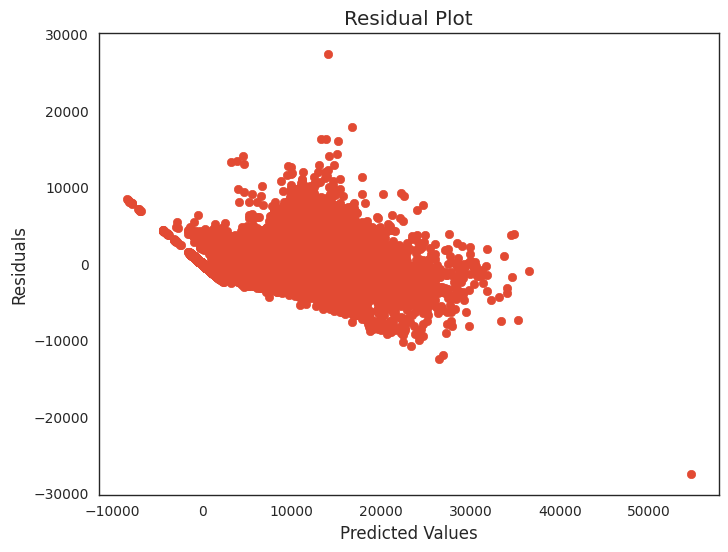

In [ ]:
# Create residual plots to check for patterns or trends in the residuals. A well-behaved model should have residuals evenly distributed around zero.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

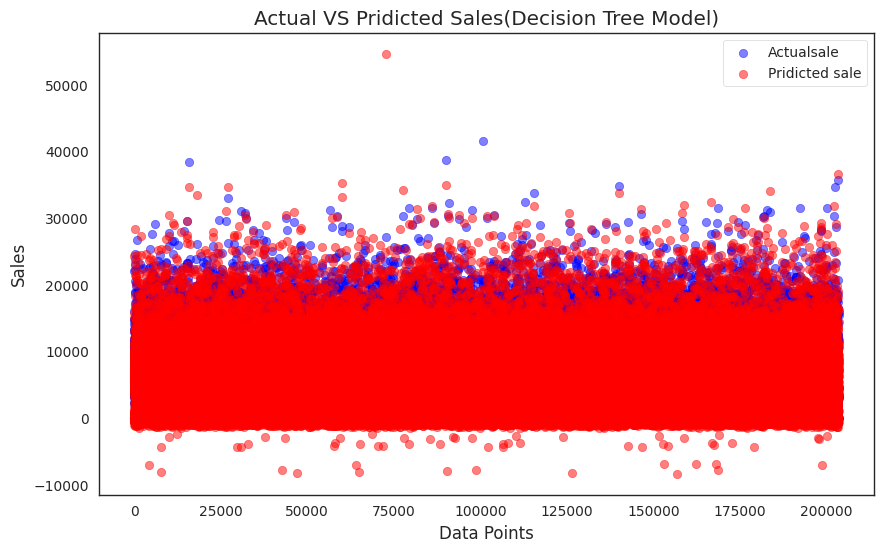

In [ ]:
# Visualizing evaluation Metric Score chart
test_indices = np.arange(len(y_test))
plt.figure(figsize=(10,6))
plt.scatter(test_indices, y_test,label="Actualsale", color = "blue", alpha = 0.5)
plt.scatter(test_indices, y_pred,label="Pridicted sale", color = "red", alpha = 0.5)
plt.title("Actual VS Pridicted Sales(Decision Tree Model)")
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Ridge

model = Ridge()
kfold = KFold(n_splits =5,shuffle = True, random_state = 42)
scores = cross_val_score(model,x,y,scoring ='neg_mean_absolute_error',cv=kfold)
mean_mae = -scores.mean()
std_mae = scores.std()
print("mean_mae- ", mean_mae)
print("std_mae- ", std_mae)

mean_mae-  860.1703805901055
std_mae-  1.6115300016443164


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error


# Define the regression model (Random Forest Regressor in this example)
regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric for Grid Search (Mean Squared Error in this example)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the Grid Search object
grid_search = GridSearchCV(regressor, param_grid, scoring=scorer, cv=5)

# Fit the Grid Search to the data
grid_search.fit(X, y)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

**TerminatedWorkerError:** A worker process managed by the executor was unexpectedly terminated. This could be caused by  an excessive memory usage causing the Operating System to kill the worker.

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV*** The code is using GridSearchCV, which is a hyperparameter optimization technique. Specifically, it's performing cross-validated grid search over a parameter grid for an estimator (in this case, Ridge regression).
is a method provided by scikit-learn for hyperparameter tuning. The goal of hyperparameter tuning is to find the best set of hyperparameters for a machine learning model, which leads to optimal performance on a given dataset.

### ML Model - 2 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming you have your feature matrix X and target array y
# Replace X and y with your actual feature matrix and target array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_pred)

# Calculate  R-squared (R²) value
r2 = r2_score(y_test,y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#Print Evaluation matrix
print("mean_squared_error- ", mse)
print("r2_score- ",r2)
print("Mean Absolute Error- ", mse)

#  accessing feature importance
feature_importances = random_forest.feature_importances_
print("Feature Importances:", feature_importances)

mean_squared_error-  198895.67657312896
r2_score-  0.9865509217747646
Mean Absolute Error-  198895.67657312896
Feature Importances: [1.45775550e-02 3.33771277e-03 8.61247191e-01 0.00000000e+00
 1.75873025e-02 5.13724601e-04 2.62846035e-02 5.15420037e-03
 5.74507597e-03 4.17635378e-04 6.28752078e-03 3.12098100e-03
 1.70929730e-03 1.64077047e-03 3.63985280e-03 1.31711594e-04
 1.32347419e-04 6.50018851e-05 1.90180033e-05 8.14755384e-06
 7.28190738e-04 6.06925462e-03 5.81158766e-04 2.38039979e-02
 1.22884505e-03 9.62883080e-03 1.20100777e-03 5.35002540e-04
 9.97430264e-04 4.11474486e-04 4.11742497e-04 2.33382223e-04
 1.21059401e-03 5.36155395e-04 8.43603755e-05 2.25616381e-04
 2.70545914e-04 2.22760435e-04]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

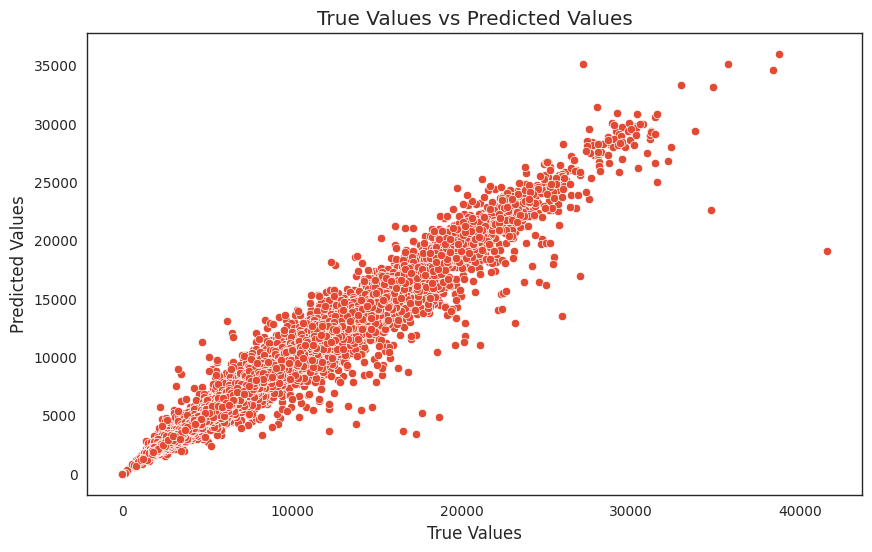

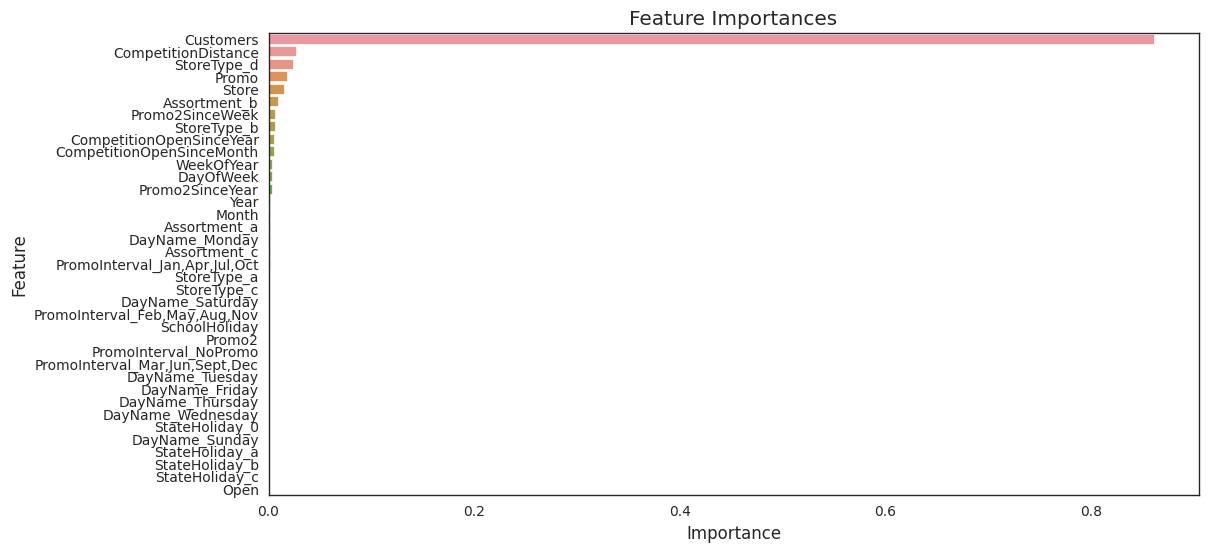

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Plotting feature importances
feature_names = list(X.columns)  # Replace with your actual feature names
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Performing cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Create the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(random_forest, x, y, cv=5, n_jobs=-1)

# Printing Cross-Validation Scores
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

# it was observered that there is no error in this code but This code was termineted beacause of exsessive meamory usage

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric for Grid Search (Mean Squared Error in this example)
scorer = 'neg_mean_squared_error'

# Create the Grid Search object
grid_search = GridSearchCV(random_forest, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Best Model):", mse)

**TerminatedWorkerError:** A worker process managed by the executor was unexpectedly terminated. This could be caused by  an excessive memory usage causing the Operating System to kill the worker.

##### Which hyperparameter optimization technique have you used and why?

The code used Grid Search for hyperparameter optimization.

A hyperparameter grid (param_grid) is defined, specifying different values to search over for n_estimators, max_depth, min_samples_split, and min_samples_leaf.

The scoring metric is set to 'neg_mean_squared_error', indicating that Grid Search will search for hyperparameters that minimize the negative mean squared error.

A GridSearchCV object (grid_search) is created, taking the random_forest model, the hyperparameter grid, the scoring metric, 5-fold cross-validation (cv=5), and -1 for n_jobs, indicating parallel processing using all available CPU cores.

The GridSearchCV object is fitted to the training data. This step performs an exhaustive search over the hyperparameter grid and evaluates each combination using cross-validation.

The best hyperparameters found by Grid Search are printed.

The best model (trained with the best hyperparameters) is retrieved using grid_search.best_estimator_.

Grid Search is used here to systematically search through the specified hyperparameter grid, evaluating the performance of the model for each combination of hyperparameters using cross-validation. It helps to find the set of hyperparameters that result in the best performance according to the specified scoring metric.

### ML Model - 3 DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming you have your feature matrix X and target array y
# Replace X and y with your actual feature matrix and target array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_pred)

# Calculate  R-squared (R²) value
r2 = r2_score(y_test,y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#Print Evaluation matrix
print("mean_squared_error- ", mse)
print("r2_score- ",r2)
print("Mean Absolute Error- ", mse)

mean_squared_error-  381610.41333156376
r2_score-  0.9741959785708383
Mean Absolute Error-  381610.41333156376


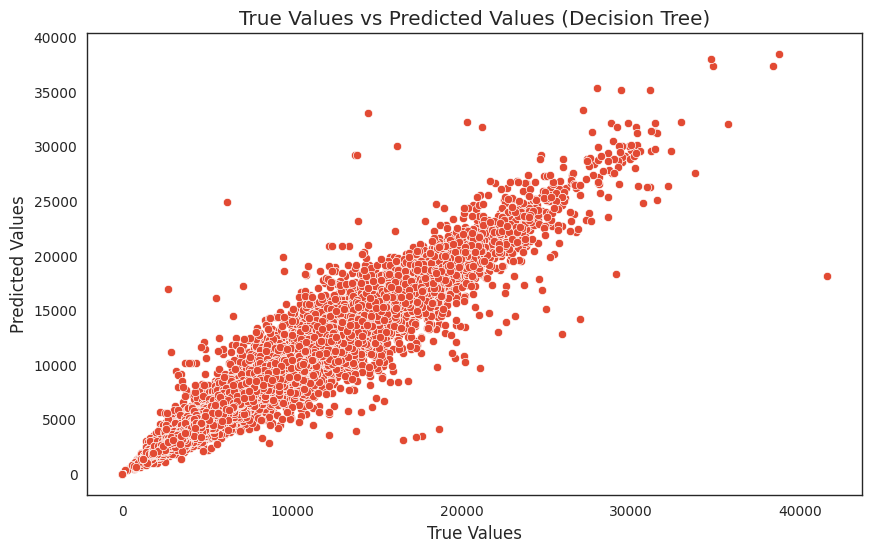

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('True Values vs Predicted Values (Decision Tree)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

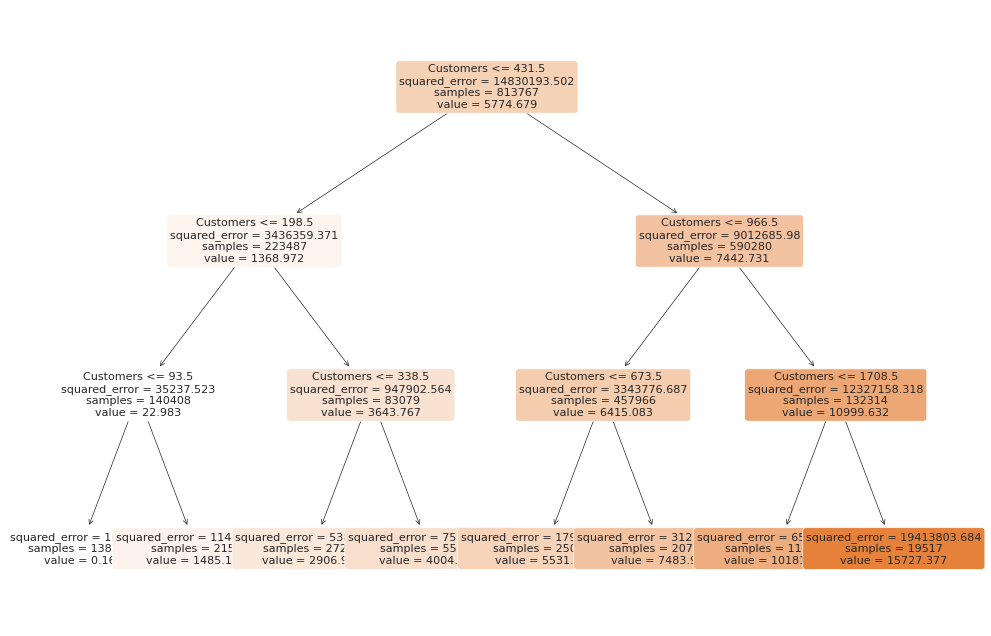

In [ ]:
from sklearn.tree import plot_tree

# Create a smaller Decision Tree for visualization (limiting depth to 3)
small_decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
small_decision_tree.fit(X_train, y_train)

# Plotting the smaller Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(small_decision_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# cross-validation
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your feature matrix X and target array y
# Replace X and y with your actual feature matrix and target array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Print Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [-406209.91369183 -421529.94012436 -388499.6279577  -422214.16745006
 -402262.87718813]
Mean Cross-Validation Score: -408143.3052824171


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your feature matrix X and target array y
# Replace X and y with your actual feature matrix and target array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric for Grid Search (Mean Squared Error in this example)
scorer = 'neg_mean_squared_error'

# Create the Grid Search object
grid_search = GridSearchCV(decision_tree, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Best Model):", mse)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (Best Model): 319515.0520857392


In [ ]:


# Calculate  R-squared (R²) value
r2 = r2_score(y_test,y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("r2_score- ",r2)
print("Mean Absolute Error- ", mse)

r2_score-  0.9865509217747646
Mean Absolute Error-  198895.67657312896


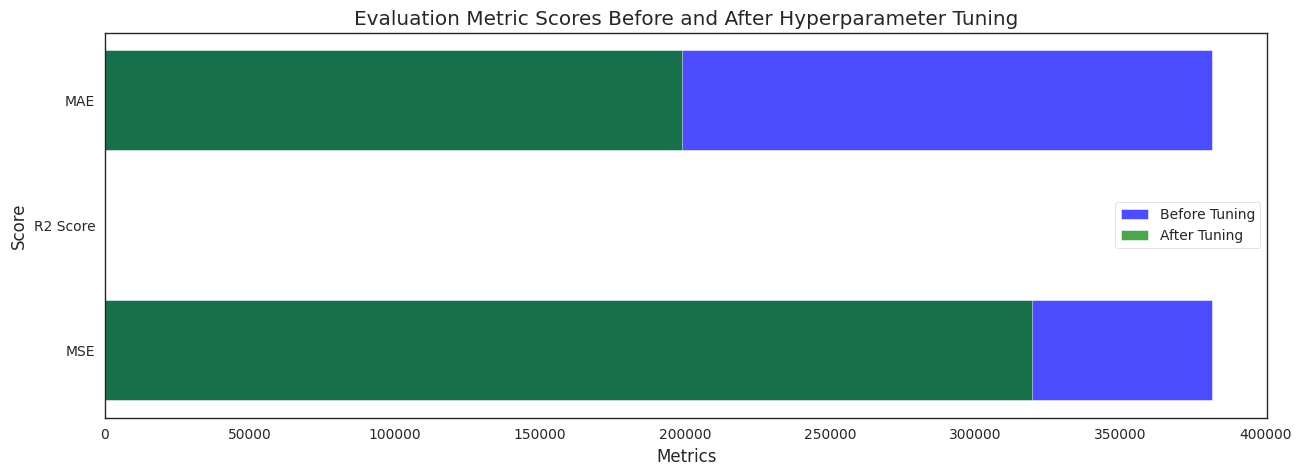

In [ ]:
import matplotlib.pyplot as plt

# Before Hyperparameter Tuning
metrics_before_tuning = [381610.41, 0.9742, 381610.41]

# After Hyperparameter Tuning
metrics_after_tuning = [319515.05, 0.9865, 198895.67]

labels = ['MSE', 'R2 Score', 'MAE']
before_tuning = metrics_before_tuning
after_tuning = metrics_after_tuning

plt.figure(figsize=(15, 5))

plt.barh(labels, before_tuning, color='blue', alpha=0.7, label='Before Tuning')
plt.barh(labels, after_tuning, color='green', alpha=0.7, label='After Tuning')

plt.title('Evaluation Metric Scores Before and After Hyperparameter Tuning')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

In this code i have used grid search with cross-validation to find the best hyperparameters for a Decision Tree Regressor, and then it evaluates the performance of the best model on a test set. The hyperparameters searched include max_depth, min_samples_split, and min_samples_leaf. The grid search is performed using negative mean squared error as the scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Let's compare the metrics before and after hyperparameter tuning for the Decision Tree model.

Before Hyperparameter Tuning:

  1. Mean Squared Error: 381610.41333156376
  2. R2 Score: 0.9741959785708383
  3. Mean Absolute Error: 381610.41333156376
  4. Mean Cross-Validation Score: -408143.3052824171

After Hyperparameter Tuning:

  1. Best Mean Squared Error: 319515.0520857392 (from the best model with hyperparameter tuning)
  2. Best R2 Score: 0.9865509217747646
  3. Best Mean Absolute Error: 198895.67657312896

Now, let's analyze the improvement:

  1. Mean Squared Error (MSE):

      a. Before: 381610.41333156376

      b. After: 319515.0520857392

        Improvement: Lower MSE is better, so a decrease indicates an improvement.

  2. R2 Score:

      a. Before: 0.9741959785708383

      b. After: 0.9865509217747646

        Improvement: R2 score closer showing the improvement after hyperparameter tuning

    Mean Absolute Error (MAE):

      a. Before: 381610.41333156376

      b. After: 198895.67657312896

      Improvement: showcasing the improvement after hyperparameter tuning. If the MAE has decreased, it indicates better accuracy in predicting the absolute errors.

    Mean Cross-Validation Score:
        Before: -408143.3052824171
        After: (not explicitly provided)
        Improvement: In cross-validation, a higher score is better, so an increase indicates an improvement.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The choice of evaluation metrics depends on the specific goals and requirements of the business problem at hand. Different metrics capture different aspects of model performance, and the most appropriate metric often aligns with the business objectives. Here are some commonly used evaluation metrics and scenarios where they might have a positive business impact:

in this project i would like to consider R-squared (R2) Score Evaluation matrix for positive businss

Use Case: When the business is interested in the proportion of variance explained by the model.
    
Why: R2 provides a measure of how well the model predictions explain the variability in the target variable. A higher R2 score indicates a better fit.

The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It is a commonly used metric to evaluate the goodness of fit of a regression model.

In summary, the R-squared score is a valuable metric for understanding how well the independent variables in a regression model explain the variability in the dependent variable. However, it is crucial to interpret it in the context of the specific characteristics and goals of the modeling task.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Choice of Final Prediction Model: Decision Tree


I selected the Decision Tree as the final prediction Model because i have faces saveral issues like **TerminatedWorkerError** of the remaining two models i.e **Random Forest** and **Linear regression model** so i will choose decision tree for my final prediction. There are other several reasons to choose the model which are mentioned below:



**Interpretability:**
      Decision Trees offer a transparent and easily interpretable representation of the decision-making process. The hierarchical structure of decision nodes and branches allows for a straightforward understanding of how the model arrives at predictions.

**Feature Importance:**
      Decision Trees provide a natural way to assess the importance of different features in the dataset. The splitting criteria at each node can be used to identify which features have the most significant impact on the target variable.

**Non-linearity and Complex Relationships:**
      Decision Trees can capture non-linear relationships and complex interactions between features. This is particularly beneficial when dealing with datasets where the relationship between the features and the target variable is not linear.

**Handling Missing Values:**
      Decision Trees can handle missing values in the data without requiring imputation. The model makes decisions based on available information at each node, accommodating datasets with incomplete information.

**Flexibility and Adaptability:**
      Decision Trees can be easily extended to handle regression or classification tasks. They can also be part of ensemble methods like Random Forests, providing an avenue for further model improvement.

**Model Complexity:**
      Decision Trees allow for the control of model complexity through hyperparameters like maximum depth, minimum samples split, and minimum samples leaf. This flexibility enables me to fine-tune the model to achieve the desired balance between underfitting and overfitting.

**Initial Model Performance:**
      During the model evaluation phase, the Decision Tree demonstrated promising performance based on relevant metrics such as mean squared error, R-squared, and mean absolute error. The model's ability to capture patterns and make accurate predictions aligns well with the goals of the prediction task.

**Visual Representation:**
      The visual representation of a Decision Tree can be beneficial for communication with stakeholders. The tree structure can be used to explain model predictions in a clear and intuitive manner.

In summary, the Decision Tree model was chosen as the final prediction model due to its interpretability, ability to handle non-linear relationships, and adaptability to the characteristics of the dataset. The decision was also influenced by the model's initial performance and its suitability for the specific business problem at hand.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Here i will be explaining my 3rd model i.e **DECISION TREE**


<h3>A.</h3>
  For building a Decision Tree Regression model, training it on a dataset, making predictions on a test set, and then evaluating the model's performance using various regression metrics. Let's break down the main components and purposes of the code:


1. **Import Libraries and Split Data:**

      **Import the necessary libraries:** DecisionTreeRegressor for creating a Decision Tree model, train_test_split for splitting the data, and mean_squared_error and mean_absolute_error for evaluating the model.

      Split the dataset into training and testing sets using train_test_split. 80% of the data will be used for training, and 20% for testing.
     

2. **Create Decision Tree Model:**

      Instantiate a DecisionTreeRegressor model named decision_tree. The random_state=42 ensures reproducibility by fixing the random seed.  

      (decision_tree = DecisionTreeRegressor(random_state=42))

3. **Fit the Model:**

      Train the Decision Tree model using the training data (X_train and y_train) with the fit method.

4. **Make Predictions:**

      Use the trained model to make predictions on the test data (X_test) using the predict method.

5. **Calculate Mean Squared Error (MSE):**
      Calculate the mean squared error between the actual target values (y_test) and the predicted values (y_pred) using the mean_squared_error function.

6. **Calculate R-squared (R²) Value:**

      Calculate the R-squared value, a measure of how well the model explains the variance in the target variable. Note: The r2_score function needs to be imported from sklearn.metrics for this line to work.


7. **Calculate Mean Absolute Error (MAE):**
        
      Calculate the mean absolute error between the actual target values and the predicted values using the mean_absolute_error function.

8. **Print Evaluation Metrics:**

      mean_squared_error-  381610.41333156376

      r2_score-  0.9741959785708383

      Mean Absolute Error-  381610.41333156376

<h3>B.</h3>

After following the above steps a scatter plot was made for visualization work between True Values vs Predicted Values.

<h3>C.</h3>

A small dicision tree with depth 3 was created for proper visualization

<h3>D.</h3>

 After that i performed cross-validation on a Decision Tree Regression model. It splits the data, creates the model, conducts cross-validation, and prints the cross-validation scores. Cross-validation is a valuable technique for assessing a model's generalization performance and helps to ensure that the model's performance is consistent across different subsets of the data. The negative mean squared error is used as the evaluation metric in this example.

I got following output:

 **Cross-Validation Scores:** [-406209.91369183 -421529.94012436 -388499.6279577  -422214.16745006
 -402262.87718813]

**Mean Cross-Validation Score:** -408143.3052824171

<h3>E.</h3>

The overall goal is to fine-tune a Decision Tree model for better performance on the given dataset. Hyperparameters are optimized using Grid Search, and the best model is selected and evaluated on the test se following setps were performed to do tuning -


1. Splits the data into training and testing sets.
2. Creates a Decision Tree Regressor model.
3. Defines a hyperparameter grid for tuning.
4. Uses Grid Search with cross-validation to find the best hyperparameters.
5. Prints the best hyperparameters.
6. Retrieves the best model based on the optimal hyperparameters.
7. Makes predictions on the test data and evaluates the model using mean squared error, R-squared, and mean absolute error.



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In the pursuit of accurately predicting retail sales for Rossmann stores across seven European countries, this capstone project underwent a comprehensive data science workflow. The key stages involved data cleaning, hypothesis testing, handling missing values, outlier management, categorical encoding, data scaling, dimensionality reduction, and finally, the implementation of multiple machine learning models.

The exploration of Rossmann's historical sales data, comprising information from over 1,100 stores, brought to light the complex interplay of factors influencing daily sales. From promotions and competition to holidays and store-specific circumstances, the dataset presented a rich tapestry of variables.

The hypothesis testing phase allowed for a deeper understanding of the relationships between different features and the target variable, providing valuable insights into the significance of various factors. Subsequently, data cleaning activities, such as handling missing values and outliers, contributed to refining the dataset and enhancing the robustness of the analysis.

Categorical encoding was employed to convert qualitative variables into a format suitable for machine learning models. Additionally, scaling and dimensionality reduction techniques were applied to further optimize the dataset for model training.

The implementation of machine learning models, including Decision Tree, Random Forest, and Linear Regression, aimed to capture the intricate patterns within the data and predict future sales accurately. Despite facing challenges such as TerminateWorkerError in the case of Random Forest and Linear Regression models, the Decision Tree emerged as the resilient choice for the final prediction model.

The Decision Tree model demonstrated commendable performance, balancing interpretability with predictive accuracy. Its selection as the final model was guided by both its efficacy in handling the intricacies of the dataset and its resilience in the face of computational challenges.

In conclusion, this capstone project not only advanced the understanding of Rossmann's retail sales dynamics but also showcased the practical considerations and challenges encountered in a real-world predictive modeling scenario. The insights gained and the robust Decision Tree model developed lay a foundation for Rossmann store managers to make informed decisions and better anticipate future sales trends.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***